<a href="https://colab.research.google.com/github/samarjithMnagesha/pytorch/blob/main/Py_torch_operations_and_building_basic_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import torch
import numpy as np

Torch Operations

In [129]:
import torch

In [130]:
my_torch=torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [131]:
#reshpe and view
my_torch=torch.arange(10)
my_torch_1=my_torch.reshape(2,5)
my_torch_1

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [132]:
my_torch_2=my_torch.reshape(2,-1)
my_torch_2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [133]:
my_torch_3=my_torch.view(2,5)
my_torch_3

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [134]:
#reshpe and view
my_torch_4=torch.arange(15)
my_torch_4=my_torch_4.reshape(-1,5)
my_torch_4

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

In [135]:
#slice
my_torch[2:5]

tensor([2, 3, 4])

In [136]:
my_torch_4[:,2]

tensor([ 2,  7, 12])

In [137]:
my_torch_4[:,2:]

tensor([[ 2,  3,  4],
        [ 7,  8,  9],
        [12, 13, 14]])

In [138]:
from einops import rearrange

x = torch.randn(2, 3, 4)
y = rearrange(x, 'b c h -> b h c')  # Permute dimensions
z = rearrange(x, 'b c h -> (b h) c')  # Flatten batch and height


In [139]:
z

tensor([[ 0.8689,  0.1703, -0.4646],
        [-0.4228,  0.8816,  0.7982],
        [ 0.9790, -1.4872,  0.1221],
        [ 0.1321,  1.6352,  1.6296],
        [ 1.3271, -0.0330,  1.1316],
        [ 0.8426, -1.6271,  0.3495],
        [-0.0922, -2.2065, -0.8870],
        [ 0.3551, -0.7764, -0.0276]])

In [140]:
t_1=torch.tensor([1,3,5,7])
t_2=torch.tensor([2,4,1,8])

In [141]:
t_3=t_1+t_2
t_3
t_add=torch.add(t_1,t_2)
t_add

tensor([ 3,  7,  6, 15])

In [142]:
t_4=t_1-t_2
t_4

tensor([-1, -1,  4, -1])

In [143]:
t_5=t_1*t_2

In [144]:
t_5

tensor([ 2, 12,  5, 56])

In [145]:
t_add

tensor([ 3,  7,  6, 15])

In [146]:
t_mul=torch.multiply(t_1,t_2)

In [147]:
t_mul

tensor([ 2, 12,  5, 56])

In [148]:
t_rem=torch.remainder(t_2,t_1)

In [149]:
t_rem

tensor([0, 1, 1, 1])

In [150]:
t_ex=torch.pow(t_1,t_2)
t_ex

tensor([      1,      81,       5, 5764801])

Create a basic Neural Network Model


In [151]:
import torch
import torch.nn as nn
import torch.nn.functional as f


In [152]:
#create a model class that in herits nn.module
class model(nn.Module):
  #input layer
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self, x):
    x=f.relu(self.fc1(x))
    x=f.relu(self.fc2(x))
    x=self.out(x)
    return x

In [153]:
torch.manual_seed(41)
#create am imstnce of model
model_test=model()

load data

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [155]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_fd=pd.read_csv(url)


In [156]:
my_fd.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


converting string to integer


In [157]:
my_fd['species']=my_fd['species'].replace('setosa',0.00)
my_fd['species']=my_fd['species'].replace('versicolor',1.0)
my_fd['species']=my_fd['species'].replace('virginica',2.0)


In [158]:
x=my_fd.drop('species',axis=1)
y=my_fd['species']

Coverting into array

In [159]:
X=x.values
Y=y.values

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=52)

In [162]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [163]:
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [164]:
#set creiteria of model to measure ther error
ceiterion=nn.CrossEntropyLoss()
#chose Adam Optimizer, lrearning rate
optimizer=torch.optim.Adam(model_test.parameters(), lr=0.01)

In [165]:
#training the model
epochs=200
losses=[]
for i in range (epochs):
  y_pred=model_test.forward(X_train)
  loss=ceiterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
 # losses.append(loss.detach().numpy())losses.append(loss)
  if i%10==0:
    print(f'epoch: {i} and loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 and loss: 1.129756212234497
epoch: 10 and loss: 1.0308372974395752
epoch: 20 and loss: 0.85707688331604
epoch: 30 and loss: 0.6045037508010864
epoch: 40 and loss: 0.4038498103618622
epoch: 50 and loss: 0.27236542105674744
epoch: 60 and loss: 0.1851300299167633
epoch: 70 and loss: 0.12894883751869202
epoch: 80 and loss: 0.09409991651773453
epoch: 90 and loss: 0.0735076516866684
epoch: 100 and loss: 0.061076827347278595
epoch: 110 and loss: 0.05318998917937279
epoch: 120 and loss: 0.04775560647249222
epoch: 130 and loss: 0.043725334107875824
epoch: 140 and loss: 0.038787003606557846
epoch: 150 and loss: 0.03453964367508888
epoch: 160 and loss: 0.031161366030573845
epoch: 170 and loss: 0.028582366183400154
epoch: 180 and loss: 0.026712266728281975
epoch: 190 and loss: 0.025127414613962173


Text(0, 0.5, 'loss')

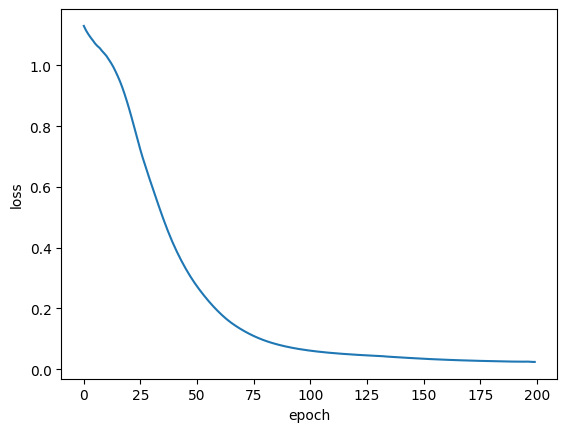

In [166]:
 plt.plot(range(epochs), losses)
 plt.xlabel('epoch')
 plt.ylabel('loss')